In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

# Exercise
Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. \
In the end figure out the model with best performance,\

Logistic Regression\
SVM\
Decision Tree\
Random Forest\

# Load data

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


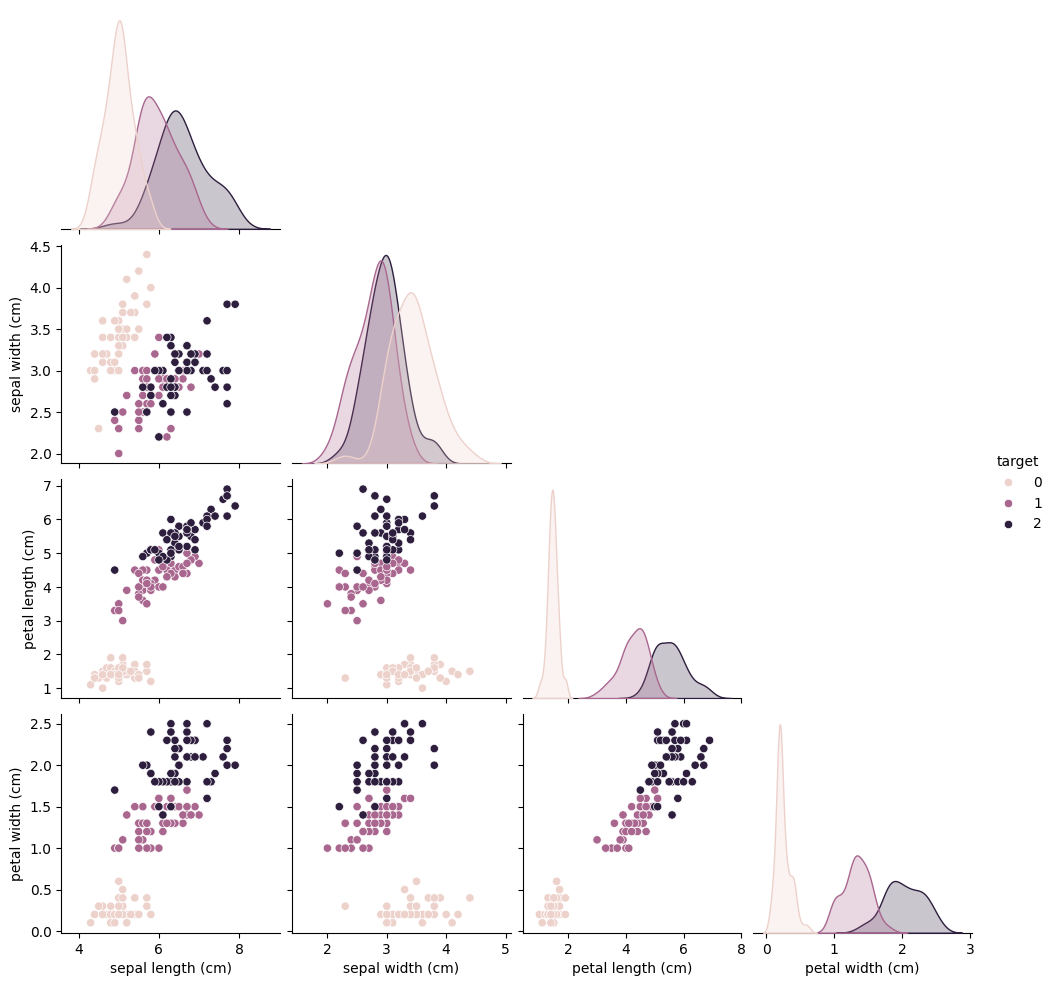

In [7]:
sns.pairplot(df, hue='target', corner=True)

# Prepare Model

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

In [40]:
lr = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50, criterion='gini')
models = [lr,svm, tree, rf]

In [19]:
lr.get_params( 'multi_class': 'ovr')

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
X = df.drop('target', axis=1)
y = df['target']

In [42]:
# Initialize an empty dictionary to store results
results_dict = {'Model': [], 'Average Score': [], 'Score Array': []}

# Iterate through models
for m in models:
    score = cross_val_score(m, X, y, cv = 10)
    score_rounded = np.round(score,3)
    # print(f'{m} with average score {np.average(score)}')
    # print(f'score array: {score}')
    results_dict['Model'].append(str(m))
    results_dict['Average Score'].append(score.mean())
    results_dict['Score Array'].append(score_rounded)


c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [43]:
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)
results_df

,Model,Average Score,Score Array
0,LogisticRegression(),0.973333,"[1.0, 0.933, 1.0, 1.0, 0.933, 0.933, 0.933, 1...."
1,SVC(),0.973333,"[1.0, 0.933, 1.0, 1.0, 1.0, 0.933, 0.933, 0.93..."
2,DecisionTreeClassifier(),0.953333,"[1.0, 0.933, 1.0, 0.933, 0.933, 0.867, 0.933, ..."
3,RandomForestClassifier(n_estimators=50),0.966667,"[1.0, 0.933, 1.0, 0.933, 0.933, 0.933, 0.933, ..."
